In [1]:
#import relevant Libraries
!pip install optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, accuracy_score, f1_score, confusion_matrix
le = LabelEncoder()
import optuna
from optuna.samplers import TPESampler

Traceback (most recent call last):
  File "C:\Users\rrajguru\AppData\Local\Continuum\anaconda3\Scripts\pip-script.py", line 5, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\rrajguru\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_internal\__init__.py", line 40, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\rrajguru\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_internal\cli\autocompletion.py", line 8, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\rrajguru\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_internal\cli\main_parser.py", line 12, in <module>
    from pip._internal.commands import (
  File "C:\Users\rrajguru\AppData\Local\Continuum\anaconda3\lib\site-packages\pip\_internal\commands\__init__.py", line 6, in <module>
    from pip._internal.commands.completion import CompletionCommand
  File "C:\Users\rrajguru\AppData\Local\Continuum

ModuleNotFoundError: No module named 'pandas_profiling'

In [2]:
#importing the data
train = pd.read_csv(r"C:\Users\rrajguru\Desktop\Data Science rajguru\Machine Learning\InCePteZ Hackathon\Cross Sell  Prediction\train.csv")
test = pd.read_csv(r"C:\Users\rrajguru\Desktop\Data Science rajguru\Machine Learning\InCePteZ Hackathon\Cross Sell  Prediction\test.csv")
sampl_sub = pd.read_csv(r"C:\Users\rrajguru\Desktop\Data Science rajguru\Machine Learning\InCePteZ Hackathon\Cross Sell  Prediction\sample_submission_iA3afxn.csv")

In [3]:
#Rows and Columns
train.shape

(381109, 12)

In [4]:
#Rows and Columns
test.shape

(127037, 11)

In [5]:
#Columns in train
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [7]:
train['Response'] = le.fit_transform(train['Response'])

NameError: name 'le' is not defined

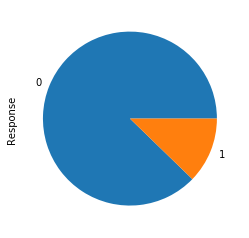

In [8]:
train["Response"].value_counts().plot.pie()

In [ ]:
#So the target variable is imbalanced, thus we have to perform sampling methods, only 12.3% customers purchase insurance

In [9]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Exploratory Data Analysis

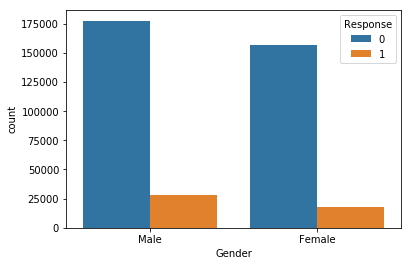

In [10]:
# Gender
sns.countplot(train["Gender"],hue = train["Response"])

### Insights
It is Evident that Male Gender buys higher (14%) which is greater than females(10%).

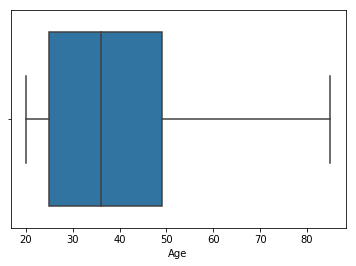

In [11]:
#Age
sns.boxplot(train["Age"], hue = train["Response"])

### Insights
Most of the insurance are purchased by the people in the age group between 30-40
The age group under 20-30 are less likely to buy insurance

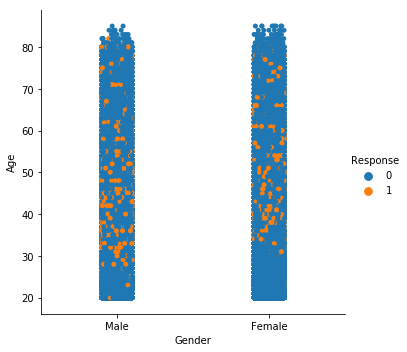

In [12]:
sns.catplot(x = "Gender", y = "Age", hue = "Response", data = train)

### Insight
1) The Females under the age of 30 are very less likely to purchase the insurance products

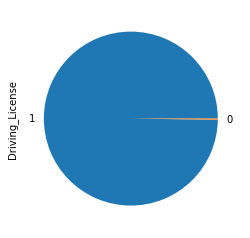

In [13]:
train["Driving_License"].value_counts().plot.pie()

### Insight
1) very Few People Donot have vehicle driving license

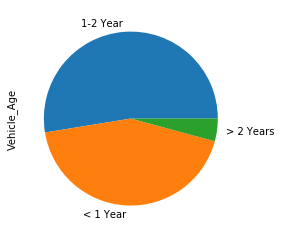

In [14]:
train["Vehicle_Age"].value_counts().plot.pie()

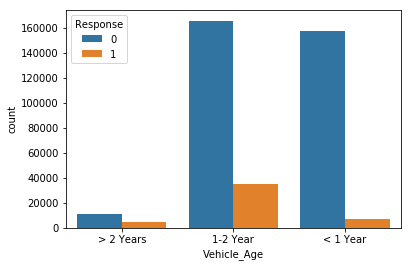

In [15]:
sns.countplot(train["Vehicle_Age"],hue = train["Response"])

### Insights
1) We have very few customers with Vehicle_Age `>2 years

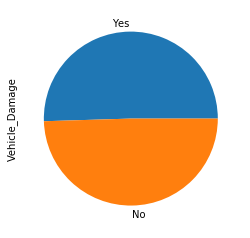

In [16]:
train["Vehicle_Damage"].value_counts().plot.pie()

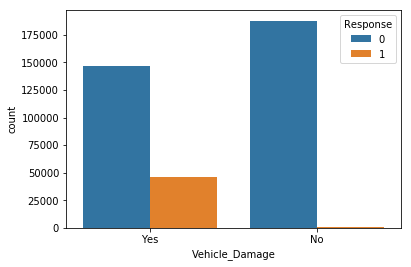

In [17]:
sns.countplot(train["Vehicle_Damage"], hue = train["Response"])

### Insights
1) We have almost same number of customes with damaged and non_damaged vehicle.
2) Customers with Vehicle_Damage are likely to buy insurance
3) Customers with non damaged vehicle have least chance (less than 1%) of buying insurance.

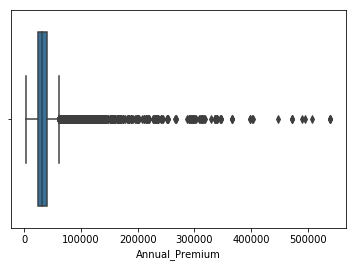

In [18]:
sns.boxplot(train["Annual_Premium"])

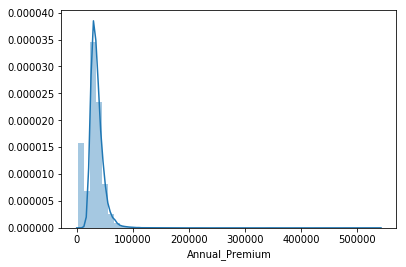

In [19]:
sns.distplot(train["Annual_Premium"])

### Insights
1) The Annual Premium data is highly left skewed
2) Most of the customers fall in the range of annual premium (0-100000)

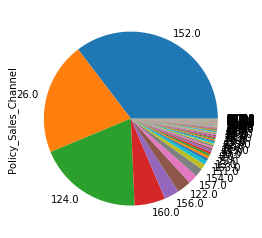

In [20]:
train["Policy_Sales_Channel"].value_counts().plot.pie()

### Insights
1) The most used policy channel tends to the channel 152, which has more customers.

In [ ]:
# Concatenating test and train data
train['is_train'] = 1
test['is_train'] = 0
test['Response'] = None

In [ ]:
data = pd.concat((train,test))
data.set_index('id',inplace=True)
data.shape

In [ ]:
pandas_profiling.ProfileReport(data)

In [ ]:
corr_check = data.copy()

col_ls = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

for col in col_ls:
    corr_check[col] = le.fit_transform(corr_check[col])

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_check.corr(), annot=True, square=True,annot_kws={'size': 10})

In [ ]:
data

In [ ]:
data["Gender"].value_counts()

In [ ]:
data["Gender"] = data["Gender"].replace({'Male' : 1, 'Female':0})

In [ ]:
data["Vehicle_Age"].value_counts()

In [ ]:
data["Vehicle_Age"] = data["Vehicle_Age"].replace({'< 1 Year':0, '1-2 Year' : 1,'> 2 Years':2})

In [ ]:
data["Vehicle_Damage"].value_counts()

In [ ]:
data["Vehicle_Damage"] = data["Vehicle_Damage"].replace({'Yes':1, 'No':0})

In [ ]:
# Changing Datatype
train['Region_Code']=train['Region_Code'].astype(int)
test['Region_Code']=test['Region_Code'].astype(int)
train['Policy_Sales_Channel']=train['Policy_Sales_Channel'].astype(int)
test['Policy_Sales_Channel']=test['Policy_Sales_Channel'].astype(int)

In [ ]:
data

In [ ]:
data["Response"].value_counts().plot.pie()

In [ ]:
accept = data[data["Response"]==1]

In [ ]:
accept.shape

In [ ]:
train_preprocessed = data[data["is_train"]==1]

In [ ]:
test_preprocessed = data[data["is_train"]==0]

In [ ]:
del train_preprocessed["is_train"]
train_preprocessed

In [ ]:
del test_preprocessed["is_train"]
test_preprocessed

In [ ]:
train_X = train_preprocessed.drop(columns = "Response")

In [ ]:
train_Y = train_preprocessed["Response"]
train_Y=train_Y.astype('int')

In [ ]:
test_X = test_preprocessed.drop(columns = "Response")

In [ ]:
test_Y = test_preprocessed["Response"]
test_Y = test_Y.astype('bool')

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train_X, train_Y)

In [ ]:
pred_train = model.predict(train_X)
pred_test = model.predict(test_X)

In [ ]:
print("train_auc_roc",roc_auc_score(train_Y, pred_train))

In [ ]:
print("test_auc_roc",roc_auc_score(test_Y, pred_test))

28

In [3]:
import pandas as pd

In [2]:
!pip install pandas-profiling

ERROR: Could not find a version that satisfies the requirement pandas-profiling (from versions: none)
ERROR: No matching distribution found for pandas-profiling
